In [2]:
count = 5
print('{}'.format(count) + '.npy')

5.npy


In [32]:
import os
import SimpleITK as sitk
import numpy as np
import CT
def ConvertAndSaveCTs(slice, source= 'D:\MEDSLIKE',destination='D:\MEDSLIKE\converted'):
    count = 0
    for root, dirs, filenames in os.walk(source):

        A = CT.LoadCTAsArray()[slice]
        np.save(destination +'{}'.format(count) + '.npy',arr  =A)
        print(count)
        count = count+1
        '''if count >=20:
            break'''

In [33]:
ConvertAndSaveCTs(55)

TypeError: list indices must be integers or slices, not list

In [11]:
import CT
import numpy as np
A= CT.LoadCTAsArray(0)

In [5]:
len(A)

216

In [6]:
len(A[5])

512

In [7]:
len(A[5,3])

512

In [9]:
A[100,100,100]

0.037226677

In [18]:
#np.max(A) 
import SimpleITK as sitk
#sitk.Show(sitk.ReadImage('D:/MEDSLIKE/00000.mha'))
slika = sitk.ReadImage('D:/MEDSLIKE/00001.mha')
slika[5,5,5]

0.0

In [21]:
slika= sitk.ReadImage('C:/00000.mha')
slika[5,5,5] = 1
slika[5,5,5]
sitk.Show(slika)

In [54]:
import CT
import SimpleITK as sitk
Barr = CT.LoadCTAsArray(5)
B = CT.getImage(5)
print(len(Barr))
print(len(Barr[0]))
print(len(Barr[0,0]))
#print(Barr[215,511,511])  <--MAX VREDNOSTI! Z*X*Y
#print(B[511,511,215]) <--MAX VREDNOSTI!     Y*X*Z
print(Barr[215,220,285]) #array je le na 5 decimalk!
print(B[285,220,215]) #<--glih obratno je

216
512
512
1.10866
1.1086640357971191


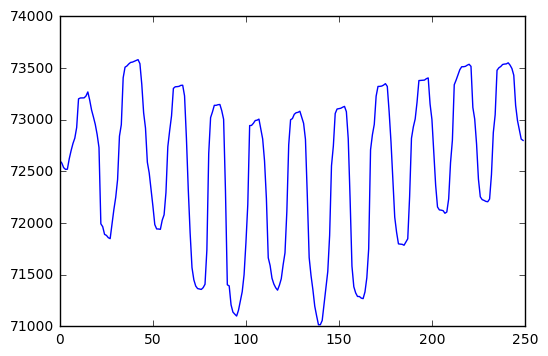

In [1]:
import SimpleITK as sitk
import numpy as np
_arr = sitk.GetArrayFromImage(sitk.ReadImage('C:/MEDSLIKE/main.mha'))
_ARRX = np.sum(_arr, axis = 2)
#print(len(_ARRX))
#print(len(_ARRX[0]))
_ARRXX = np.sum(_ARRX, axis = 1)
import matplotlib.pyplot as plt
plt.plot(_ARRXX)
plt.show()

In [7]:
import SimpleITK as sitk
arr = sitk.GetArrayFromImage(sitk.ReadImage('C:/MEDSLIKE/main2.mha'))
print(len(arr))
print(len(arr[0]))
print(len(arr[0,0]))
b = 0
for i in arr:
    b +=1
    #if (b>100): print(b)
    if (b==250): print(i) #i je dejansko celotn slice

250
512
512
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [4]:
import SimpleITK as sitk
import scipy.spatial as sp
import CT

arr1 = CT.LoadCTAsArray(4)
arr2 = CT.LoadCTAsArray(15)
sp.distance.directed_hausdorff(arr1,arr2)

ValueError: Buffer has wrong number of dimensions (expected 2, got 3)

In [11]:
import CT
import SimpleITK as sitk
import numpy as np
from tqdm import tqdm

def comparisonFunction(a,b):
    return abs(a - b)
def compareCTs(ct1, ct2, writeMHAdir = 'C:/00000.mha'):
    arr1 = sitk.GetArrayFromImage(ct1)
    arr2 = sitk.GetArrayFromImage(ct2)
    mha = sitk.ReadImage(writeMHAdir)
    for z in range(len(arr1)):
        for y in range(len(arr1[z])): 
            for x in range(len(arr1[z,y])):
                mha[x,y,z] = np.float32(comparisonFunction(arr1[z,y,x], arr2[z,y,x])).item()
    sitk.Show(mha)
compareCTs(CT.GetImage(80),CT.GetImage(81))

In [20]:
import CT
import SimpleITK as sitk
import numpy as np
from tqdm import tqdm

hah = CT.GetImage(10)
x1 = 171
x2 = 188
x = abs(x1-x2)
y1=233
y2=248
y = abs(y1-y2)
z1=117
z2=126
z=abs(z1-z2)

newimg = sitk.Image(x,y,z, sitk.sitkFloat64)
for i in tqdm(range(x)):
    for j in range(y):
        for k in range(z):
            newimg[i,j,k] = hah.GetPixel(i+x1,j+y1,k+z1)
            #print(hah.GetPixel(i,j,k))
sitk.Show(newimg) #ITSWORKS

  0%|          | 0/17 [00:00<?, ?it/s]

100%|██████████| 17/17 [00:00<00:00, 404.74it/s]

In [2]:
import CT
import SimpleITK as sitk
import numpy as np
from tqdm import tqdm

hah = CT.GetImage(10)
x1 = 171
x2 = 188
x = abs(x1-x2)
y1=233
y2=248
y = abs(y1-y2)
z1=117
z2=126
z=abs(z1-z2)
blabla = CT.CropImage(x1,x2,y1,y2,z1,z2,hah)

  0%|          | 0/17 [00:00<?, ?it/s]

100%|██████████| 17/17 [00:00<00:00, 548.36it/s]

In [3]:
import numpy as np
g= [[[55,3,432,4,3,3] , [432,4,4,5,5,5], [432,4,4,5,5,5]], [[55,3,432,4,3,3] , [432,4,4,5,5,5], [432,4,4,5,5,5]]]
hah = np.array(g)
hah.size

36

In [4]:
import CT
slika = CT.GetImage(10)

In [6]:
import SimpleITK as sitk
slika.GetHeight()

512

In [6]:
slika.GetDimension()

3

KeyboardInterrupt: 

In [2]:
import SimpleITK as sitk
import CT as CT
testIMG = CT.GetImage(consecutive_number=5)

In [3]:
bla = sitk.GradientMagnitude(testIMG)
sitk.Show(bla)

In [ ]:
CT.LoadCTAsArray()

In [11]:
x = [2,3,3,2,3,18,23,5,2,2,4,5]
def hah(bla):return bla+1
map(hah,x)
print(x2[2])

TypeError: 'map' object is not subscriptable